In [1]:
import hopsworks
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
from matplotlib import pyplot
from hsml.schema import Schema
from hsml.model_schema import ModelSchema
import joblib
import os

/u/11/zhangz13/unix/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# You have to set the environment variable 'HOPSWORKS_API_KEY' for login to succeed
api = 'HeCatNGJxisb99Vf.ircWdTrkgbbZpBMU7iPN2zqDIwoTuaSX88LPeISIMJHuzP3icXixNd6JFcWUqakL'
project = hopsworks.login(api_key_value = api)
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/229529
Connected. Call `.close()` to terminate connection gracefully.


In [3]:
wine_fg = fs.get_or_create_feature_group(
    name="wine_2",
    version=5,
    primary_key=["fixed_acidity","volatile_acidity","citric_acid", "residual_sugar"	,"chlorides",	
                 "free_sulfur_dioxide",	"total_sulfur_dioxide",	"density","pH","sulphates","alcohol","quality"], 
    description="For new wine data")

In [4]:

import pandas as pd
import random
from great_expectations.dataset import PandasDataset
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)
suite = ExpectationSuite(expectation_suite_name="wine_dimensions")
expect(suite, "fixed_acidity", 3.5, 16.0)
expect(suite, "volatile_acidity", 0.06,1.60)
expect(suite, "citric_acid", 0.0,7.5)
expect(suite, "residual_sugar", 0.3,66.0)
expect(suite, "chlorides", 0.00,0.65)
expect(suite, "free_sulfur_dioxide", 0.8,290.0)
expect(suite, "total_sulfur_dioxide", 5.5,450.0)
expect(suite, "density", 0.95,1.03)
expect(suite, "ph", 0.3,4.5)
expect(suite, "sulphates", 0.2, 2.5)
expect(suite, "alcohol", 7.8, 15.5)
expect(suite, "quality", 0,2)


def generate_synthetic_wine(seed):
    random.seed(seed)
    return {
        "fixed_acidity": 5.0,  
        "volatile_acidity": 0.51,
        "citric_acid": 0.3,
        "residual_sugar":1.0,
        "chlorides":0.55,
        "free_sulfur_dioxide":30.0,
        "total_sulfur_dioxide":32.0,
        "density":0.98,
        "ph":3.6,
        "sulphates":random.uniform(1.3, 1.5),
        "alcohol":11.5,
        "quality":1
    }

wine_fg = fs.get_or_create_feature_group(
    name="wine_2",
    version=5,
    primary_key=["fixed_acidity","volatile_acidity","citric_acid", "residual_sugar"	,"chlorides",	
                 "free_sulfur_dioxide",	"total_sulfur_dioxide",	"density","pH","sulphates","alcohol","quality"], 
    description="For new wine data")

num_samples = 10  # Number of synthetic samples to generate

synthetic_wines_new1 = [generate_synthetic_wine(seed=i) for i in range(num_samples-1)]
# synthetic_wines_new = generate_synthetic_wine(seed=2)
# Convert the list of dictionaries to a DataFrame
synthetic_wines_df = pd.DataFrame(synthetic_wines_new1)
synthetic_wines_ge_df = PandasDataset(synthetic_wines_df)
# Validate the entire DataFrame
results = synthetic_wines_ge_df.validate(expectation_suite=suite, result_format="SUMMARY")

# Check if the new data meets the expectations
if results["success"]:
    wine_fg.insert(synthetic_wines_df, overwrite=False, operation="append")
    print("All synthetic wine data inserted successfully.")
else:
    print("Data validation failed:", results)

# Validate against the expectations
# results = new_wine_df.validate(expectation_suite=suite, result_format="SUMMARY")

# Check if the new data meets the expectations
# if results["success"]:
#     wine_fg.insert(new_wine_df,
#                    overwrite=False,
#                    operation="append")
#         # new_df,
#         # overwrite=False,  # Set to True if you want to overwrite existing data
#         # operation="append",  # Choose between "insert", "upsert", or "append"
#         # Specify other parameters if needed
# else:
#     print("Data validation failed:", results)


Data validation failed: {
  "evaluation_parameters": {},
  "meta": {
    "great_expectations_version": "0.14.13",
    "expectation_suite_name": "wine_dimensions",
    "run_id": {
      "run_name": null,
      "run_time": "2023-11-20T21:26:21.324445+00:00"
    },
    "batch_kwargs": {
      "ge_batch_id": "731a56a4-87eb-11ee-938f-eb43c4c70878"
    },
    "batch_markers": {},
    "batch_parameters": {},
    "validation_time": "20231120T212621.324327Z",
    "expectation_suite_meta": {
      "great_expectations_version": "0.14.13"
    }
  },
  "statistics": {
    "evaluated_expectations": 12,
    "successful_expectations": 0,
    "unsuccessful_expectations": 12,
    "success_percent": 0.0
  },
  "results": [
    {
      "meta": {},
      "expectation_config": {
        "expectation_type": "expect_column_values_to_be_between",
        "meta": {},
        "kwargs": {
          "column": "fixed_acidity",
          "min_value": 3.5,
          "max_value": 16,
          "result_format": "SUMMAR

In [ ]:
feature_view_newsamples = fs.get_feature_view(name="wine_2",
                                  version=5)
X_train1, X_test1, y_train, y_test = feature_view_newsamples.train_test_split(test_size=0.2)
print("length of x X_train:",X_train1.shape)
print("length of x X_test:",X_test1.shape)


In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 150,
                                    criterion = 'entropy')
y_train_1d = y_train.values.ravel() if isinstance(y_train, pd.DataFrame) else y_train.ravel()
y_test_1d = y_test.values.ravel() if isinstance(y_test, pd.DataFrame) else y_test.ravel()

classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
print("y_pred max is:",y_train.max())
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average='weighted')
rec = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


print(model_results)

y_pred max is: quality    2
dtype: int64
                   Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest (n=100)  0.861163   0.845733  0.861163  0.845963


In [10]:
# Evaluate model performance using the features from the test set (X_test)
y_pred = model.predict(X_test)

# Compare predictions (y_pred) with the labels in the test set (y_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8442776735459663


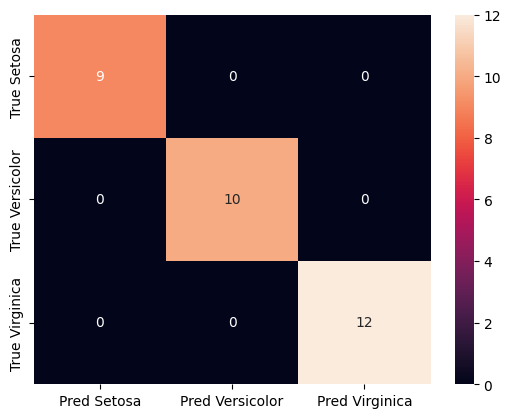

In [9]:
# Create the confusion matrix as a figure, we will later store it as a PNG image file
# df_cm = pd.DataFrame(results, ['True Setosa', 'True Versicolor', 'True Virginica'],
#                      ['Pred Setosa', 'Pred Versicolor', 'Pred Virginica'])
# cm = sns.heatmap(df_cm, annot=True)
# fig = cm.get_figure()

In [12]:
# We will now upload our model to the Hopsworks Model Registry. First get an object for the model registry.
mr = project.get_model_registry()

# The contents of the 'iris_model' directory will be saved to the model registry. Create the dir, first.
model_dir="wine_model"
if os.path.isdir(model_dir) == False:
    os.mkdir(model_dir)

# Save both our model and the confusion matrix to 'model_dir', whose contents will be uploaded to the model registry
joblib.dump(model, model_dir + "/wine_model.pkl")
# fig.savefig(model_dir + "/confusion_matrix.png")    

# Specify the schema of the model's input/output using the features (X_train) and labels (y_train)
input_schema = Schema(X_train)
output_schema = Schema(y_train)
model_schema = ModelSchema(input_schema, output_schema)
# Ensure that the metrics are single numerical values
wine_model = mr.python.create_model(
    name="wine_model", 
    metrics={
        "accuracy": model_results['Accuracy'].iloc[0],
        "Precision": model_results['Precision'].iloc[0],
        "Recall": model_results['Recall'].iloc[0],
        "F1_score": model_results['F1 Score'].iloc[0]
    },
    model_schema=model_schema,
    description="Wine Quality Predictor"
)

# Upload the model to the model registry, including all files in 'model_dir'
wine_model.save(model_dir)


Connected. Call `.close()` to terminate connection gracefully.


Uploading: 100.000%|██████████| 1695/1695 elapsed<00:01 remaining<00:00:01,  3.25it/s]
Uploading: 100.000%|██████████| 1072/1072 elapsed<00:01 remaining<00:000:04,  1.16s/it]
Model export complete: 100%|██████████| 6/6 [00:09<00:00,  1.65s/it]                   

Model created, explore it at https://c.app.hopsworks.ai:443/p/229529/models/wine_model/1


Model(name: 'wine_model', version: 1)